#Project 1: Modeling
by: Amoreena Ordonez and Zeynep Turk

In [28]:
#importing packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler ##imported and used below if we choose KNN, Kmean, Gradient Descent, or PCA//AO
#numpy necessary?
#also need to import scikit ML packages for step 6 onwards
from sklearn.preprocessing import OrdinalEncoder

url = "https://raw.githubusercontent.com/zsturk/Dat402_Proj1/refs/heads/Step-1/ObesityDataSet_raw_and_data_sinthetic.csv"
df = pd.read_csv(url, sep = ",")

This dataset was sourced from the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition). It includes 2111 observations about health indicators and obesity levels collected in 2019 from survey participants in Colombia, Peru, and Mexico.(Note to Z: just noticed this dataset as 23% of observations collected from survey participants and 77% generated synthetically. Should we mention this or leave it out? //AO) It contains a mix of categorical and numerical features for each subject along with a target variable that classifies the subject as either Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. (Note to Z: do we want to combine the overweight and obesity levels into one of each?//AO) Our goal for this project to is find which combination of possible factors for unhealthy weight can best predict its appearance in subjects. This knowledge can help inform key risk factors for for providers to focus on when concerned about a patient who comes in underweight or obese. To begin, let's look at the variables in our data:

* Gender
* Age
* Height [in meters]
* Weight [in kilograms]
* Family history of overweight
* FAVC: Frequently eat high calorie food [yes/no]
* FCVC: Eat vegetables [wait why is this numeric] <- Three possible answers to the question: never, sometimes, always. Best guess is it was coded as 1,2,3 respectively//AO
* NCP: Number of main meals per day
* CAEC: Snacking between meals [again, numeric?] <- Similar to above note, possible answers: no, sometimes, frequently, always//AO
* Smoking [yes/no]
* CH2O: Daily water consumption [less than 1 liter, between 1 and 2 liters, more than 2 liters]
* SCC: Calorie tracking [yes/no]
* FAF: Frequency of exercise [per week: 0, 1-2 days, 2-4 days, 4-5 days]
* TUE: Screentime (phone, TV, videogames, computer) [0-2 hours, 3-5 hours, > 5 hours]
* CALC: Frequency of alcohol consumption
* MTRANS: Usual method of transportation
* NObeyesdad: Obesity level [That's how it's defined on the data site but I like weight classification better since it includes normal weight and insufficient weight. Thoughts? //AO]

##Cleaning data

Let's start with a peek at our data, as well as checking if it has any missing values.

In [4]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [19]:
df.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


There are no missing values.

Some of the columns are numeric while others not; this is something we need to adjust. The final column can stay as is, however, because it represents the targets for classification.

We can also use `dtypes` to check which of our columns are numeric.

In [20]:
df.dtypes

,0
Gender,object
Age,float64
Height,float64
Weight,float64
family_history_with_overweight,object
FAVC,object
FCVC,float64
NCP,float64
CAEC,object
SMOKE,object


We saw that many of the object columns are binary (yes/no), or ordinal (sometimes, frequently, etc). `MTRANS` (method of transportation) is a nominal measurement. For the first two types of variables, I will use label encoding to convert them to numbers; for `MTRANS` I will use one hot encoding with `pd.get_dummies()`, as the transportation categories don't have any inherent order:

In [21]:
df["MTRANS"].value_counts()

,count
MTRANS,
Public_Transportation,1580
Automobile,457
Walking,56
Motorbike,11
Bike,7


In [5]:
#copy our df
numeric_df = df.copy()

encoder = OrdinalEncoder()

numeric_df = pd.get_dummies(numeric_df,
                            columns = ["Gender", "family_history_with_overweight","FAVC", "SMOKE", "SCC"],
                            drop_first = True,
                            dtype = int)

#ordinal label encoding
numeric_df["CAEC"] = encoder.fit_transform(numeric_df[["CAEC"]])
numeric_df["CALC"] = encoder.fit_transform(numeric_df[["CALC"]])

#nominal one hot encoding
numeric_df = pd.get_dummies(numeric_df,
                            columns = ["MTRANS"],
                            drop_first = True,
                            dtype = int)

Print out the cleaned data set just to make sure the appropriate columns are numeric:

In [23]:
numeric_df.head()

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,NObeyesdad,Gender_Male,family_history_with_overweight_yes,FAVC_yes,SMOKE_yes,SCC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,2.0,3.0,2.0,2.0,0.0,1.0,3.0,Normal_Weight,0,1,0,0,0,0,0,1,0
1,21.0,1.52,56.0,3.0,3.0,2.0,3.0,3.0,0.0,2.0,Normal_Weight,0,1,0,1,1,0,0,1,0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,2.0,1.0,1.0,Normal_Weight,1,1,0,0,0,0,0,1,0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,2.0,0.0,1.0,Overweight_Level_I,1,0,0,0,0,0,0,0,1
4,22.0,1.78,89.8,2.0,1.0,2.0,2.0,0.0,0.0,2.0,Overweight_Level_II,1,0,0,0,0,0,0,1,0


In [24]:
#random code for me to see the breakdown of this variable better//AO
df["NObeyesdad"].value_counts()

,count
NObeyesdad,
Obesity_Type_I,351
Obesity_Type_III,324
Obesity_Type_II,297
Overweight_Level_I,290
Overweight_Level_II,290
Normal_Weight,287
Insufficient_Weight,272


##Exploratory Data Analysis

Let's take a look at the distribution of our dependent variable we hope to predict in our sample and see if there are any strong correlations between it and our independent variables.

<Axes: title={'center': 'Number of Observations by Weight Classification'}, xlabel='Weight Classification', ylabel='Count'>

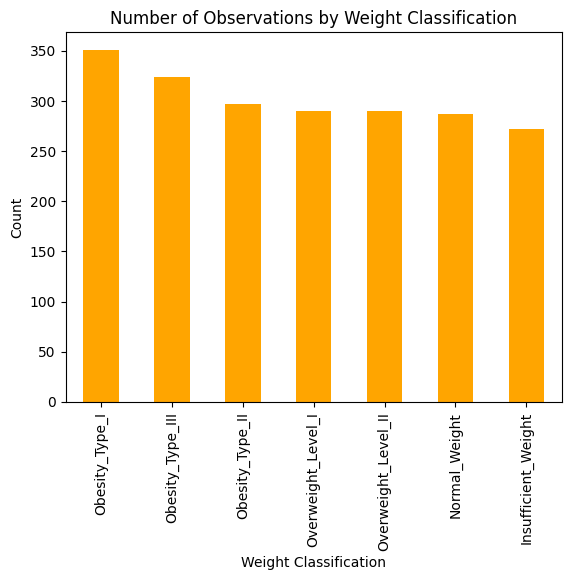

In [46]:
#Note to Amoreena: I think we should use "df" dataframe for this part, and graphing etc. since it is more "human friendly"
#and then use the "numeric_df" for the actual splitting, and training etc
#Note to Zeynep: I think that's a great idea! I do wonder if we need to code the NObeyesdad to numeric for modeling? I don't know how we would predict
#the values in a plot. Also maybe we should consolidate the levels overweight and obesity for simplicity. Thoughts?//AO

df['NObeyesdad'].value_counts().plot(kind='bar', color = 'orange', title = 'Number of Observations by Weight Classification',
                                     xlabel = 'Weight Classification', ylabel = 'Count')

In [ ]:
#other stuff

##Splitting the dataset, scaling etc

Before we can create a method for prediction, we'll use the cleaned-up DataFrame numeric_df to split the data into a training set and a testing set for the model. For our purposes and data size we will create an 80/20 split respectively after shuffling the observations to ensure randomness. While we could do this step by step, there exists a function from sickit-learn that will consolidate our code and include partitioning a validation set to save us more lines later.

In [32]:
#Z: If you think a 70/30 or 90/10 split would be better, let me know and I can change it! Also I set a random_state for the split
# at 4 so that we can reproduce the same random split for cross-validation//AO
X = numeric_df[['FCVC', 'NCP', 'CAEC', 'CH2O', 'FAF', 'TUE', 'CALC', 'FAVC_yes',
                'family_history_with_overweight_yes', 'SCC_yes']]
y = numeric_df["NObeyesdad"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 4, test_size = .20, shuffle = True)


We can double check that the split was successful by comparing the distribution of the values in our target variable NObeyesdad in the train and test set. If all went well they should be close to the same.

In [33]:
y_train.value_counts(normalize=True)

,proportion
NObeyesdad,
Obesity_Type_I,0.171209
Obesity_Type_III,0.151066
Overweight_Level_I,0.142773
Obesity_Type_II,0.136256
Normal_Weight,0.135664
Overweight_Level_II,0.132701
Insufficient_Weight,0.130332


In [34]:
y_test.value_counts(normalize=True)

,proportion
NObeyesdad,
Obesity_Type_III,0.163121
Obesity_Type_II,0.158392
Overweight_Level_II,0.156028
Obesity_Type_I,0.146572
Normal_Weight,0.137116
Insufficient_Weight,0.122931
Overweight_Level_I,0.115839


So far, so good! Let's normalize our independent variables from our two new sets for the models that will depend on them.

In [35]:
scaler = StandardScaler()
X_trainstd = scaler.fit_transform(X_train)
X_teststd = scaler.fit_transform(X_test)

##Model 1: abc

In [ ]:
#modeling...
#prediction

##Model 2: xyz

In [ ]:
#modeling...
#prediction

##Conclusion